In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

In [3]:
import cv2
import imghdr 

In [4]:
data_dir = 'data'

In [12]:
image_exts = ['jpeg','jpg','bmp','png']

In [15]:
os.listdir(data_dir)

['happy', 'sad']

In [20]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image is not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}}'.format(image_path))
            

Image is not in ext list data\happy\1rOrTgNQABn0P7dy3IrNDjg.jpeg
Image is not in ext list data\happy\2560px-Happy_People.jpg
Image is not in ext list data\happy\56f455011e0000b300705475.jpeg
Image is not in ext list data\happy\cheerful-middle-eastern-family-three-260nw-1936256839.jpg
Image is not in ext list data\happy\guilherme-stecanella-375176-unsplash.jpg
Image is not in ext list data\happy\happiness_thumbnail.jpg
Image is not in ext list data\happy\Happy20People.jpg
Image is not in ext list data\happy\portrait-smiling-young-friends-walking-260nw-1392193913.jpg
Image is not in ext list data\happy\traitshappypeople.jpg.webp
Image is not in ext list data\sad\39843138-sad-man.jpg
Image is not in ext list data\sad\50740738-sad-people-s-portraits.jpg
Image is not in ext list data\sad\african-american-depressive-sad-broken-260nw-475790911.jpg
Image is not in ext list data\sad\CC_HE_1221887081_SituationalDepression-650x428.jpg
Image is not in ext list data\sad\crying-sad.gif
Image is not 

In [23]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Tensor(3, s

In [24]:
import numpy as np
from matplotlib import pyplot as plt

In [26]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [50]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 173 files belonging to 2 classes.


In [51]:
data_iterator = data.as_numpy_iterator()

In [52]:
data_iterator

In [53]:
batch = data_iterator.next()

In [54]:
batch[0].shape

(32, 256, 256, 3)

In [55]:
batch[1]

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

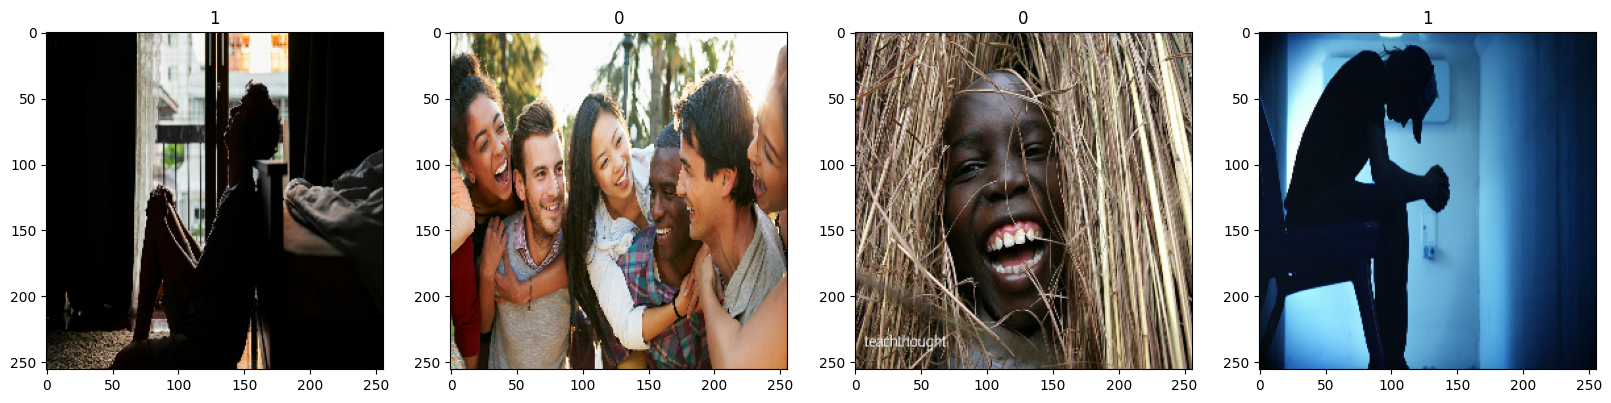

In [56]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [37]:
batch

(array([[[[ 36.162354 ,  40.397583 ,  29.198364 ],
          [ 35.154297 ,  35.035767 ,  29.008545 ],
          [ 30.63208  ,  30.120361 ,  27.635986 ],
          ...,
          [ 58.269897 ,  34.304688 ,  28.985107 ],
          [ 72.82153  ,  30.9375   ,  28.595093 ],
          [ 95.70398  ,  47.70398  ,  44.243042 ]],
 
         [[ 55.560913 ,  52.430786 ,  34.92163  ],
          [ 67.65881  ,  61.467407 ,  44.89319  ],
          [ 75.111084 ,  67.46484  ,  53.139526 ],
          ...,
          [ 75.785034 ,  47.262695 ,  38.334717 ],
          [100.17566  ,  56.42578  ,  45.722656 ],
          [128.88416  ,  82.07556  ,  64.73572  ]],
 
         [[117.74463  , 111.8114   ,  94.70166  ],
          [ 96.05945  ,  90.71179  ,  70.01648  ],
          [ 95.72681  ,  86.39844  ,  63.460693 ],
          ...,
          [ 92.18933  ,  57.759644 ,  43.36902  ],
          [140.52844  ,  95.22266  ,  72.369995 ],
          [161.87073  , 118.175415 ,  85.26135  ]],
 
         ...,
 
         [[ 

In [57]:
data = data.map(lambda x,y: (x/255,y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [61]:
batch[0].min()

0.0

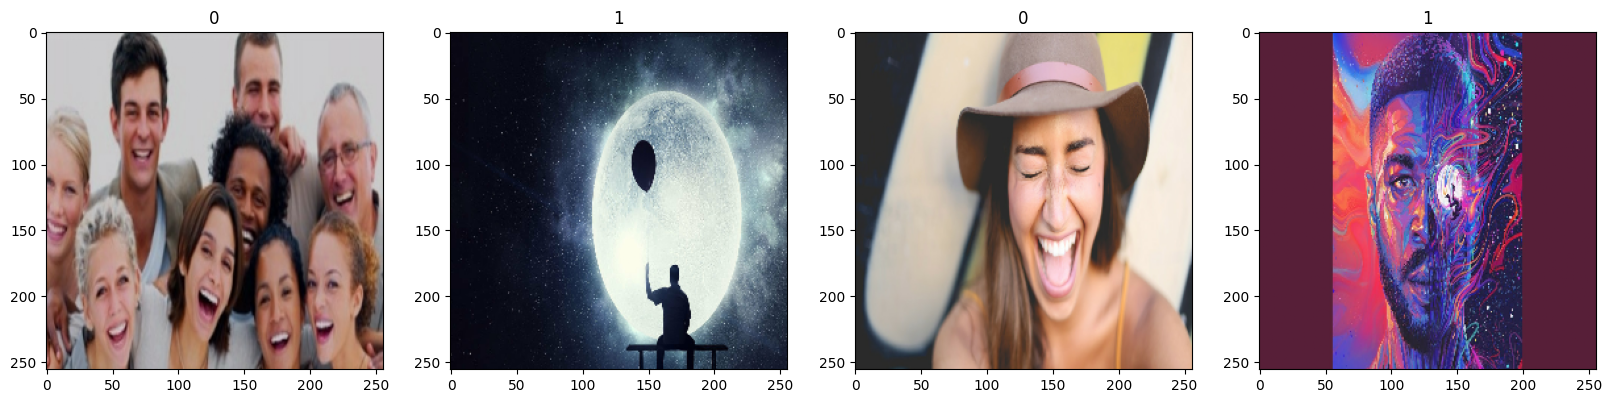

In [59]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [62]:
len(data)

6

In [66]:
train_size = int (len(data)*.6)
val_size = int (len(data)*.2)+1
test_size = int(len(data)*.1)+1


In [67]:
train_size+val_size+test_size

6

In [68]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [69]:
len(test)

1

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential()

In [76]:
model.add(Conv2D(16,(3,3),1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
                            



In [79]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics= ['accuracy'])

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [81]:
logdir = 'logs'

In [84]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [87]:
hist= model.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback]) 

Epoch 1/20
3/3 [==============================] - 33s 6s/step - loss: 2.8928 - accuracy: 0.5417 - val_loss: 4.6022 - val_accuracy: 0.3438
Epoch 2/20
3/3 [==============================] - 16s 5s/step - loss: 3.1998 - accuracy: 0.4167 - val_loss: 1.0118 - val_accuracy: 0.4531
Epoch 3/20
3/3 [==============================] - 19s 7s/step - loss: 0.8028 - accuracy: 0.4896 - val_loss: 0.6740 - val_accuracy: 0.6250
Epoch 4/20
3/3 [==============================] - 19s 6s/step - loss: 0.6834 - accuracy: 0.5208 - val_loss: 0.6665 - val_accuracy: 0.5938
Epoch 5/20
3/3 [==============================] - 19s 6s/step - loss: 0.6624 - accuracy: 0.5521 - val_loss: 0.6670 - val_accuracy: 0.5625
Epoch 6/20
3/3 [==============================] - 19s 6s/step - loss: 0.6634 - accuracy: 0.6042 - val_loss: 0.6277 - val_accuracy: 0.6250
Epoch 7/20
3/3 [==============================] - 19s 6s/step - loss: 0.6543 - accuracy: 0.6354 - val_loss: 0.6018 - val_accuracy: 0.6250
Epoch 8/20
3/3 [==================

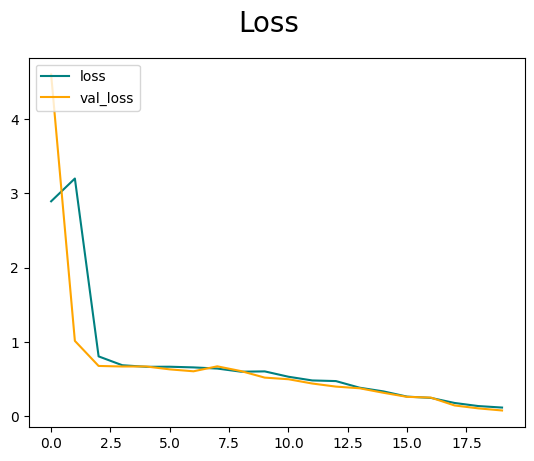

In [90]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='Orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

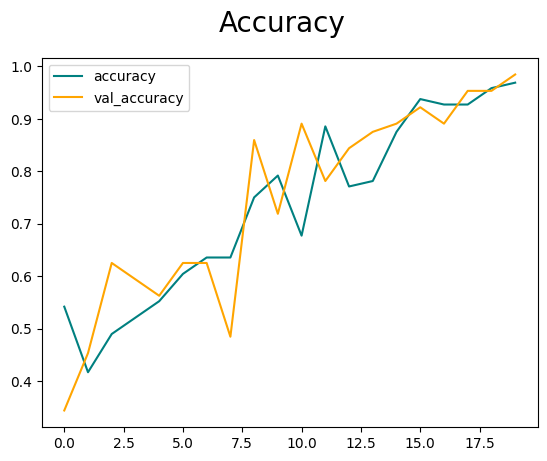

In [91]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='Orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [93]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [94]:
pre=Precision()
rec=Recall()
acc=BinaryAccuracy()

In [96]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 [==============================] - 1s 743ms/step


In [98]:
print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}') 

Precision:1.0, Recall:0.875, Accuracy:0.9230769276618958


In [99]:
import cv2

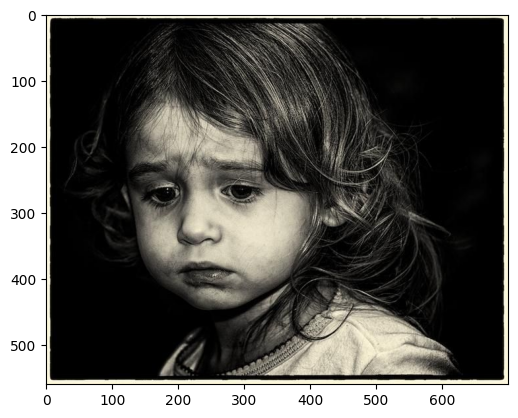

In [109]:
img = cv2.imread('sad.jpg')
#plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

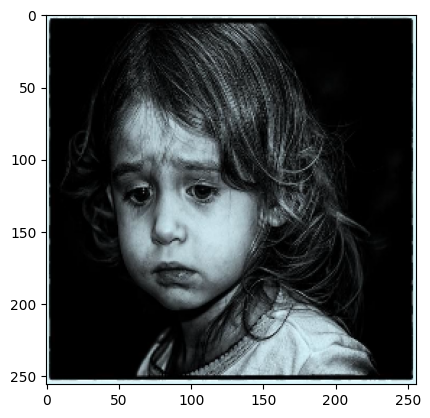

In [110]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [111]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 101ms/step


In [112]:
yhat

array([[0.9195563]], dtype=float32)

In [114]:
if yhat>0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is sad


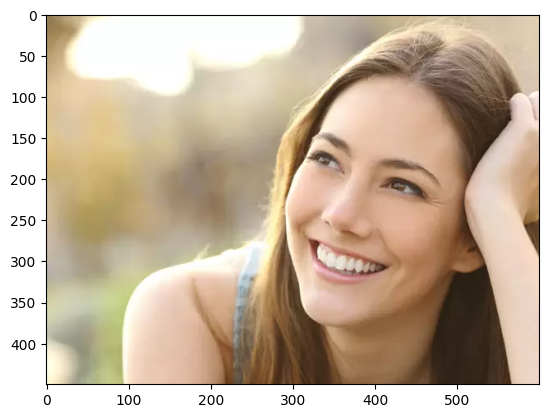

In [115]:
img = cv2.imread('happy1.jpg')
#plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

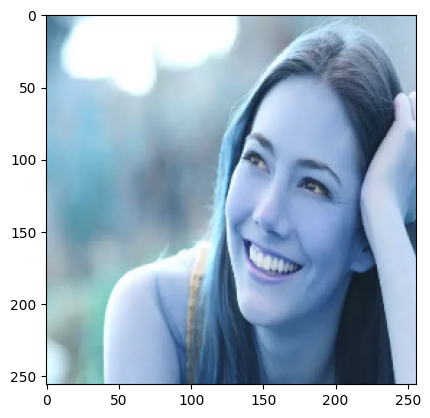

In [116]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [117]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 84ms/step


In [118]:
yhat

array([[0.35105854]], dtype=float32)

In [120]:
if yhat>0.3:
    print(f'Predicted class is Happy')
else:
    print(f'Predicted class is sad')

Predicted class is Happy


In [122]:
#save the model
from tensorflow.keras.models import load_model

In [123]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [125]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [126]:
new_model

In [128]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 273ms/step


In [129]:
if yhat>0.3:
    print(f'Predicted class is Happy')
else:
    print(f'Predicted class is sad')

Predicted class is Happy
